### Polynomial Linear Regression

🔹 Step 1: Import Required Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

🔹 Step 2: Create Sample Data (or use your own)




In [7]:
# Simple non-linear data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([2.3, 4.1, 6.7, 8.0, 11.2, 12.9, 14.8, 19.3, 21.2])


🔹 Step 3: Fit a Linear Regression (baseline)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred_linear = lin_reg.predict(X) 

🔹 Step 4: Fit Polynomial Regression (degree = 2 and 3)

In [9]:
#degree 2
poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly2.fit(X,y)
y_pred_poly2 = poly2.predict(X)
#degree 3
poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3.fit(X,y)
y_pred_poly3 = poly3.predict(X)

🔹 Step 5: Visualize the Models

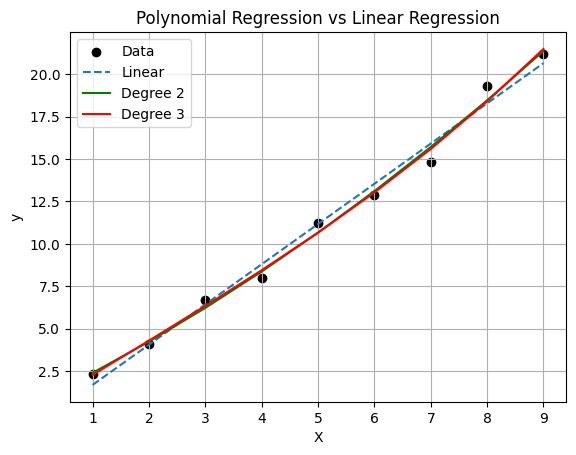

In [10]:
plt.scatter(X, y, color='black', label='Data')

# Linear fit
plt.plot(X, y_pred_linear, label='Linear', linestyle='--')

# Polynomial fits
plt.plot(X, y_pred_poly2, label='Degree 2', color='green')
plt.plot(X, y_pred_poly3, label='Degree 3', color='red')

plt.legend()
plt.title("Polynomial Regression vs Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


🔹 Step 6: Compare R² Scores

In [11]:
from sklearn.metrics import r2_score

print("Linear R²:", r2_score(y, y_pred_linear))
print("Poly (degree 2) R²:", r2_score(y, y_pred_poly2))
print("Poly (degree 3) R²:", r2_score(y, y_pred_poly3))

Linear R²: 0.9880787172580708
Poly (degree 2) R²: 0.993328218020805
Poly (degree 3) R²: 0.9935572326074726


In [13]:
# poly2.named_steps['linearregression'].coef_
poly2.named_steps['polynomialfeatures'].get_params()


{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

**`Scaler exmaple — StandardScaler()`**

In [14]:
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(2), LinearRegression())
pipe.fit(X, y)


,steps,"[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


## Comparing make_pipeline and manual controlled pipeline

✅ 1. Using make_pipeline() – Auto-Named Steps

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create the pipeline
pipe_auto = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit and predict
pipe_auto.fit([[1], [2], [3]], [2, 6, 14])  # y = 2x²
pred_auto = pipe_auto.predict([[4]])  # Predict for x=4
print("make_pipeline Prediction:", pred_auto)

pipe_auto.named_steps['polynomialfeatures']
pipe_auto.named_steps['linearregression']


make_pipeline Prediction: [26.]


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


✅ 2. Using Pipeline([...]) – Manually Named Steps


In [15]:
from sklearn.pipeline import Pipeline

# Create the pipeline with custom step names
pipe_named = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Fit and predict
pipe_named.fit([[1], [2], [3]], [2, 6, 14])
pred_named = pipe_named.predict([[4]])
print("Custom Pipeline Prediction:", pred_named)

pipe_named.named_steps['poly']
pipe_named.named_steps['regressor']


Custom Pipeline Prediction: [26.]


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**`sample testing`**

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.set_params(fit_intercept=False)

print(model.get_params())


{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Update degree in PolynomialFeatures
pipe.set_params(polynomialfeatures__degree=3)
print(pipe.get_params())

{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=3)), ('linearregression', LinearRegression())], 'transform_input': None, 'verbose': False, 'polynomialfeatures': PolynomialFeatures(degree=3), 'linearregression': LinearRegression(), 'polynomialfeatures__degree': 3, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__positive': False, 'linearregression__tol': 1e-06}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)

print("Each fold's score:", scores)
print("Average accuracy:", scores.mean())


Each fold's score: [-0.28187988  0.04161859  0.62014804  0.77256506         nan]
Average accuracy: nan


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
